## Set df

In [48]:
import pandas as pd

df = pd.read_excel(r"C:\Users\hikar\Desktop\2025_radio\5_タイプ検証\timeline_type_分析後.xlsx")
df["year"] = pd.to_datetime(df["year"], format="%Y") #yearのフォーマットを数字から年月日に変更
df = df.set_index("year")

df_radio = df[["radio"]]
df_tv = df[["tv"]]
df_newspaper = df[["newspaper"]]
df_book = df[["book"]]
df_net = df[["internet"]]

df_radio

,radio
year,
1923-01-01,12
1924-01-01,7
1925-01-01,24
1926-01-01,4
1927-01-01,2
...,...
2019-01-01,40
2020-01-01,29
2021-01-01,29


## データの観察と処理

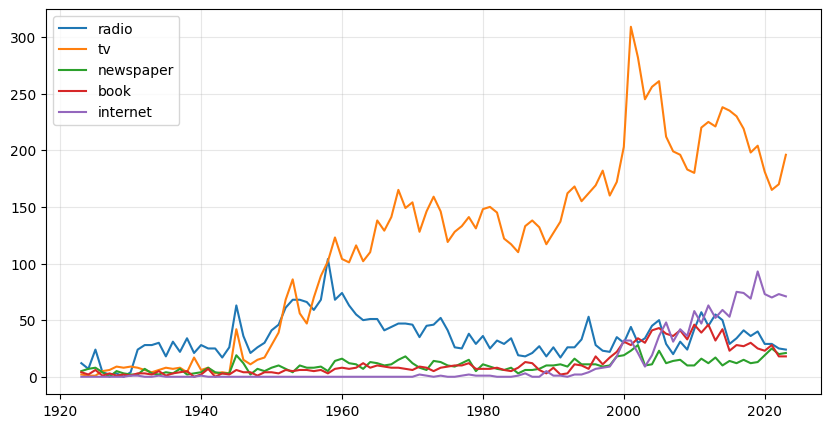

In [49]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10,5))


plt.plot(df_radio.index, df_radio["radio"],label="radio")
plt.plot(df_tv.index,df_tv["tv"],label="tv")
plt.plot(df_newspaper.index,df_newspaper["newspaper"],label="newspaper")
plt.plot(df_book.index,df_book["book"],label="book")
plt.plot(df_net.index,df_net["internet"],label="internet")

plt.grid(True, linestyle="-", alpha=0.3)

plt.legend()

plt.show()

### STL分解

**radio**

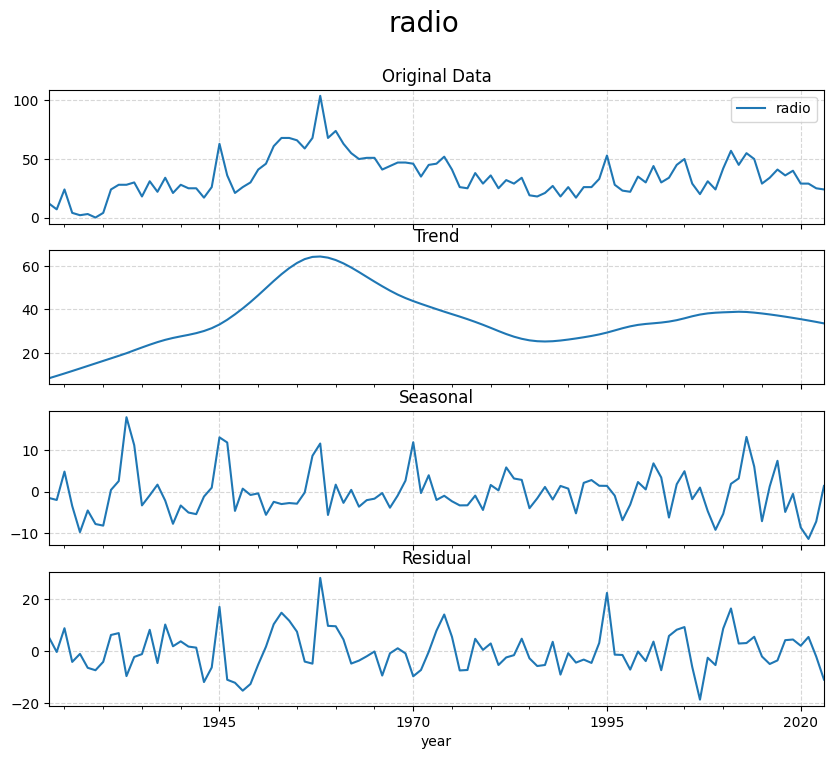

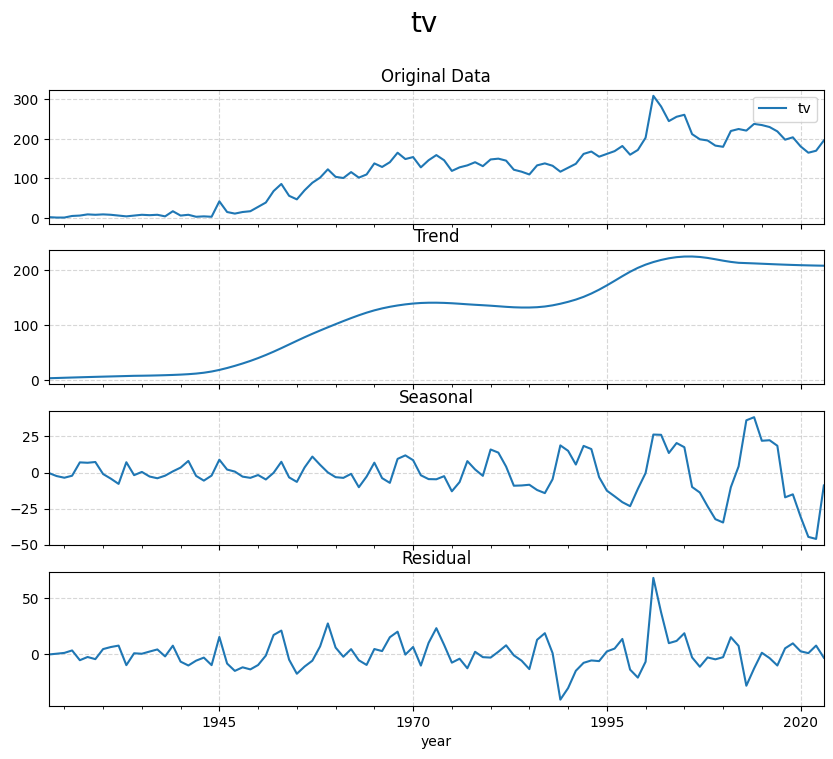

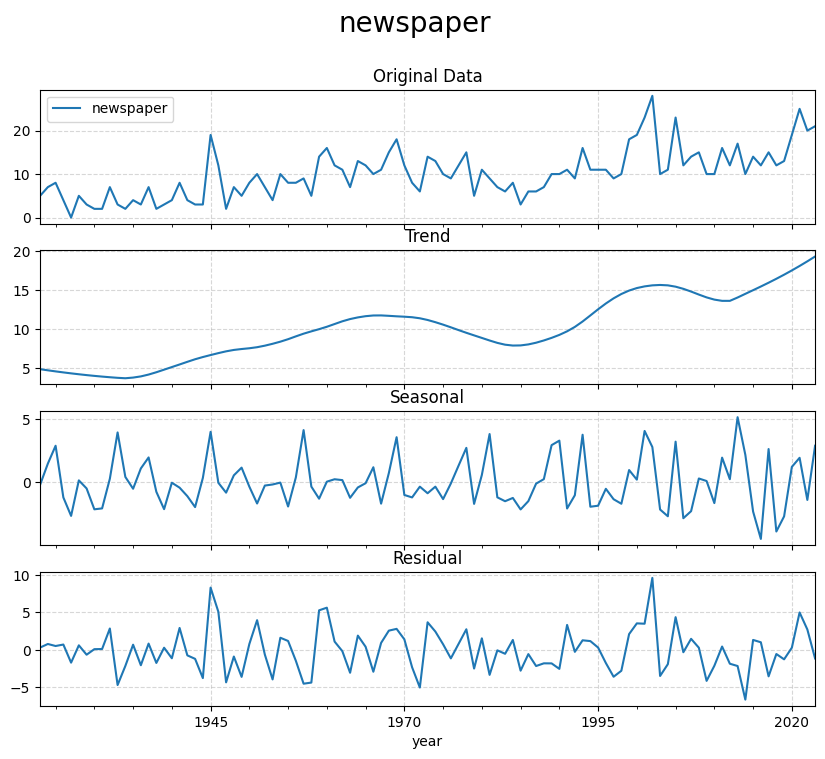

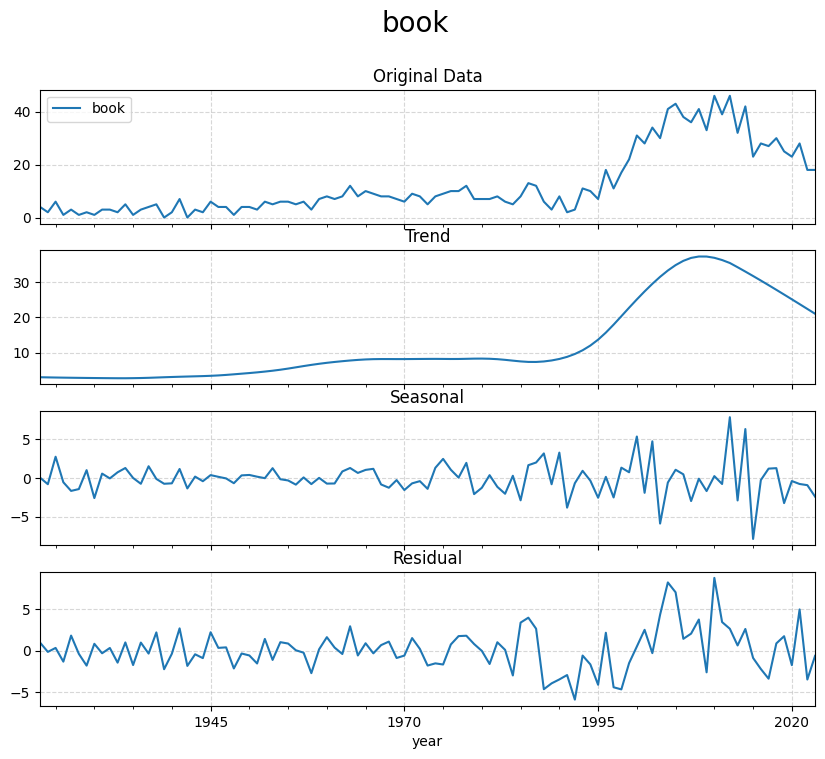

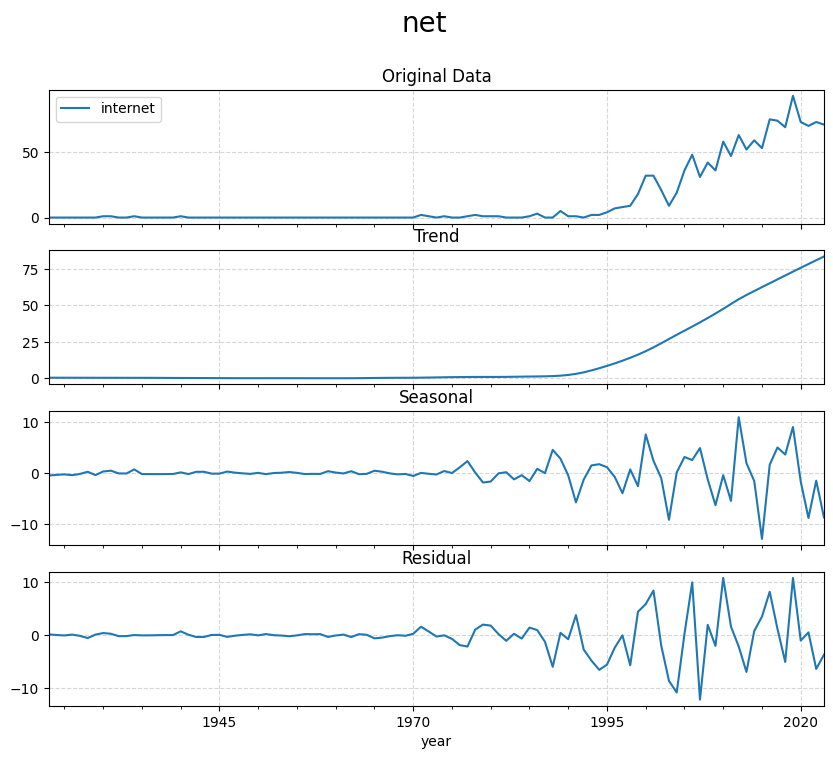

In [50]:
from statsmodels.tsa.seasonal import STL

types = ["radio", "tv", "newspaper", "book","net"]
for name in types:

    # 対象のデータフレームを取得
    df_stl = globals()[f"df_{name}"]  

    stl = STL(df_stl, period=12)
    res = stl.fit()

    # それぞれの成分を描画
    fig, axes = plt.subplots(4, 1, figsize=(10, 8), sharex=True)

    df_stl.plot(ax=axes[0])
    axes[0].grid(True, linestyle='--', alpha=0.5)
    axes[0].set_title('Original Data')

    res.trend.plot(ax=axes[1])
    axes[1].grid(True, linestyle='--', alpha=0.5)
    axes[1].set_title('Trend')

    res.seasonal.plot(ax=axes[2])
    axes[2].grid(True, linestyle='--', alpha=0.5)
    axes[2].set_title('Seasonal')

    res.resid.plot(ax=axes[3])
    axes[3].grid(True, linestyle='--', alpha=0.5)
    axes[3].set_title('Residual')

    plt.suptitle(name, fontsize = 20)

    plt.show()




### ADF判定

検定量:定常さの指標。低いほど定常になる  
p値:このデータが非定常だと仮定した場合に、サンプルデータの再現確率。低いほど、非定常である確率を否定することになり、定常性が高いと言える。  
臨界値:p値が各割合な場合の検定量。これよりも検定量が低いことでその割合よりもp値が低く、つまり定常性が高いといえる。

In [51]:
from statsmodels.tsa.stattools import adfuller

types = ["radio", "tv", "newspaper", "book","net"]
for name in types:
    print(name)
    # ADF検定を実行
    result = adfuller(globals()[f"df_{name}"])
    # 結果表示
    print('統計検定量\t: %f' % result[0])
    print('p値\t: %f' % result[1])
    # p値の評価
    if result[1] < 0.05:
        print(name +"は定常と言える")
    else:
        print(name + "は定常とはいえない")
    print()

radio
統計検定量	: -2.981046
p値	: 0.036703
radioは定常と言える

tv
統計検定量	: -1.290092
p値	: 0.633693
tvは定常とはいえない

newspaper
統計検定量	: -1.890715
p値	: 0.336441
newspaperは定常とはいえない

book
統計検定量	: -1.543036
p値	: 0.512125
bookは定常とはいえない

net
統計検定量	: 2.461503
p値	: 0.999036
netは定常とはいえない



### 差分の除去

In [60]:
types = ["newspaper","book","tv", "net"]
for name in types:
    globals()[f"df_{name}_diff"] = globals()[f"df_{name}"].diff().dropna()
    print(globals()[f"df_{name}_diff"])
    

            newspaper
year                 
1924-01-01        2.0
1925-01-01        1.0
1926-01-01       -4.0
1927-01-01       -4.0
1928-01-01        5.0
...               ...
2019-01-01        1.0
2020-01-01        6.0
2021-01-01        6.0
2022-01-01       -5.0
2023-01-01        1.0

[100 rows x 1 columns]
            book
year            
1924-01-01  -2.0
1925-01-01   4.0
1926-01-01  -5.0
1927-01-01   2.0
1928-01-01  -2.0
...          ...
2019-01-01  -5.0
2020-01-01  -2.0
2021-01-01   5.0
2022-01-01 -10.0
2023-01-01   0.0

[100 rows x 1 columns]
              tv
year            
1924-01-01  -1.0
1925-01-01   0.0
1926-01-01   4.0
1927-01-01   1.0
1928-01-01   3.0
...          ...
2019-01-01   6.0
2020-01-01 -23.0
2021-01-01 -16.0
2022-01-01   5.0
2023-01-01  26.0

[100 rows x 1 columns]
            internet
year                
1924-01-01       0.0
1925-01-01       0.0
1926-01-01       0.0
1927-01-01       0.0
1928-01-01       0.0
...              ...
2019-01-01      24.0
2020-01-01 

In [54]:
print("df_tv" in globals())
print("df_newspaper" in globals())
print("df_book" in globals())
print("df_net" in globals())


True
True
True
True
